In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from ipywidgets import interact, FloatSlider
from ipywidgets import Layout

In [2]:
df3=pd.read_csv(r"C:\Users\GPSantana\Downloads\Piramide de población.csv",sep=';')

df3['Total'] = (
    df3['Total']
    .astype(str)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
)
df3['Total'] = pd.to_numeric(df3['Total'], errors='coerce')

df3 = df3[df3['Españoles/Extranjeros'] == 'TOTAL']
df3 = df3[df3['Edad (grupos quinquenales)'] != 'TOTAL EDADES'].copy()
df3 = df3[df3['Sexo'] != 'Ambos sexos']
df3

,Edad (grupos quinquenales),Españoles/Extranjeros,Sexo,Periodo,Total
250,0-4 años,TOTAL,Hombres,2022,929686
251,0-4 años,TOTAL,Hombres,2021,969383
252,0-4 años,TOTAL,Hombres,2020,1018039
253,0-4 años,TOTAL,Hombres,2019,1048153
254,0-4 años,TOTAL,Hombres,2018,1068953
...,...,...,...,...,...
4795,100 años y más,TOTAL,Mujeres,2002,6016
4796,100 años y más,TOTAL,Mujeres,2001,5953
4797,100 años y más,TOTAL,Mujeres,2000,4079
4798,100 años y más,TOTAL,Mujeres,1999,3434


In [3]:
df4=pd.read_csv(r"C:\Users\GPSantana\Downloads\Proyeccion poblacion 2024-2070.csv",sep=';')

df4['Total'] = (
    df4['Total']
    .astype(str)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False))

df4['Total'] = pd.to_numeric(df4['Total'], errors='coerce')
df4

,Sexo,Edad,Periodo,Total
0,Total,Todas las edades,2074,5.458819e+07
1,Total,Todas las edades,2073,5.457217e+07
2,Total,Todas las edades,2072,5.456264e+07
3,Total,Todas las edades,2071,5.455982e+07
4,Total,Todas las edades,2070,5.456356e+07
...,...,...,...,...
15601,Mujeres,100 y más años,2028,1.842819e+04
15602,Mujeres,100 y más años,2027,1.710955e+04
15603,Mujeres,100 y más años,2026,1.575853e+04
15604,Mujeres,100 y más años,2025,1.468692e+04


In [4]:

df4 = df4[df4['Sexo'] != 'Total']

def edad_inicial(grupo):
    if isinstance(grupo, str):
        if grupo[0].isdigit():
            try:
                return int(grupo.split('-')[0])
            except:
                pass
        if '100' in grupo:
            return 100
    return None

df4['edad_inicial'] = df4['Edad'].map(edad_inicial)

df4 = df4.sort_values('edad_inicial').drop(columns='edad_inicial')

df4 = df4.sort_values('Periodo')
def edad_a_int(edad):
    if isinstance(edad, str):
        if '100' in edad:
            return 100
        num = ''.join(c for c in edad if c.isdigit())
        if num:
            return int(num)
    return None 


df4['Edad'] = df4['Edad'].apply(edad_a_int)

df4 = df4[df4['Edad'].notna()].copy()

df4['Edad'] = df4['Edad'].astype(int)

df4= df4.sort_values('Edad')

def grupo_quinquenal(edad):
    if edad >= 100:
        return '100 años y más'
    start = (edad // 5) * 5
    end = start + 4
    return f'{start}-{end} años'

df4['Edad (grupos quinquenales)'] = df4['Edad'].apply(grupo_quinquenal)

df4_quinquenal = df4.groupby(['Periodo','Sexo','Edad (grupos quinquenales)'])['Total'].sum().reset_index()

df4_quinquenal = df4_quinquenal[df4_quinquenal['Sexo'].isin(['Hombres', 'Mujeres'])].copy()

df4_quinq = df4_quinquenal[['Edad (grupos quinquenales)', 'Sexo', 'Periodo', 'Total']]
df4_quinq['Edad_inicial'] = df4_quinq['Edad (grupos quinquenales)'].str.extract(r'^(\d+)').astype(int)
df4_quinq = df4_quinq.sort_values('Edad_inicial').drop(columns='Edad_inicial')

df4_quinq

C:\Users\GPSantana\AppData\Local\Temp\ipykernel_1928\2668218385.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['edad_inicial'] = df4['Edad'].map(edad_inicial)
C:\Users\GPSantana\AppData\Local\Temp\ipykernel_1928\2668218385.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_quinq['Edad_inicial'] = df4_quinq['Edad (grupos quinquenales)'].str.extract(r'^(\d+)').astype(int)


,Edad (grupos quinquenales),Sexo,Periodo,Total
0,0-4 años,Hombres,2024,8.928310e+05
21,0-4 años,Mujeres,2024,8.446710e+05
735,0-4 años,Mujeres,2041,9.949763e+05
714,0-4 años,Hombres,2041,1.054668e+06
1806,0-4 años,Hombres,2067,9.985436e+05
...,...,...,...,...
1682,100 años y más,Hombres,2064,3.611534e+04
1724,100 años y más,Hombres,2065,3.814996e+04
1745,100 años y más,Mujeres,2065,1.472926e+05
2,100 años y más,Hombres,2024,2.962000e+03


In [5]:
df_full = pd.concat([df3, df4_quinq], ignore_index=True)

def edad_inicial(grupo):
    if isinstance(grupo, str):
        if grupo[0].isdigit():
            try:
                return int(grupo.split('-')[0])
            except:
                pass
        if '100' in grupo:
            return 100
    return None

In [6]:
df_full

,Edad (grupos quinquenales),Españoles/Extranjeros,Sexo,Periodo,Total
0,0-4 años,TOTAL,Hombres,2022,9.296860e+05
1,0-4 años,TOTAL,Hombres,2021,9.693830e+05
2,0-4 años,TOTAL,Hombres,2020,1.018039e+06
3,0-4 años,TOTAL,Hombres,2019,1.048153e+06
4,0-4 años,TOTAL,Hombres,2018,1.068953e+06
...,...,...,...,...,...
3187,100 años y más,NaN,Hombres,2064,3.611534e+04
3188,100 años y más,NaN,Hombres,2065,3.814996e+04
3189,100 años y más,NaN,Mujeres,2065,1.472926e+05
3190,100 años y más,NaN,Hombres,2024,2.962000e+03


In [7]:

df = df_full.copy()


jovenes = ["0-4 años","5-9 años","10-14 años"]

laboral = [
    "15-19 años","20-24 años","25-29 años","30-34 años","35-39 años",
    "40-44 años","45-49 años","50-54 años","55-59 años","60-64 años"
]

mayores = [
    "65-69 años","70-74 años","75-79 años","80-84 años","85-89 años",
    "90-94 años","95-99 años","100 años y más"
]


result = df.pivot_table(
    index="Periodo",
    columns="Edad (grupos quinquenales)",
    values="Total",
    aggfunc="sum"
)


result["p_jovenes"] = result[jovenes].sum(axis=1)
result["p_laboral"] = result[laboral].sum(axis=1)
result["p_mayores"] = result[mayores].sum(axis=1)

result["razon_dependencia_total"] = (result["p_jovenes"] + result["p_mayores"]) / result["p_laboral"] * 100
result["razon_dependencia_joven"] = (result["p_jovenes"] / result["p_laboral"]) * 100
result["razon_dependencia_mayor"] = (result["p_mayores"] / result["p_laboral"]) * 100

print(result[["razon_dependencia_total","razon_dependencia_joven","razon_dependencia_mayor"]])

Edad (grupos quinquenales)  razon_dependencia_total  razon_dependencia_joven  \
Periodo                                                                        
1998                                      45.945009                22.135969   
1999                                      46.094607                21.603049   
2000                                      45.822358                21.112556   
2001                                      45.652468                20.722611   
2002                                      45.472747                20.544205   
...                                             ...                      ...   
2070                                      69.952164                18.976945   
2071                                      70.237247                19.099608   
2072                                      70.595730                19.239999   
2073                                      71.000131                19.392148   
2074                                    

In [18]:
result.head(20)

Edad (grupos quinquenales),0-4 años,10-14 años,100 años y más,15-19 años,20-24 años,25-29 años,30-34 años,35-39 años,40-44 años,45-49 años,...,80-84 años,85-89 años,90-94 años,95-99 años,p_jovenes,p_laboral,p_mayores,razon_dependencia_total,razon_dependencia_joven,razon_dependencia_mayor
Periodo,,,,,,,,,,,,,,,,,,,,,
1998,"1,710,012.00","2,286,898.00","3,474.00","2,932,680.00","3,353,726.00","3,255,862.00","3,245,232.00","3,024,704.00","2,674,025.00","2,483,115.00",...,"801,932.00","457,565.00","160,721.00","35,590.00","6,044,585.00","27,306,620.00","6,501,444.00",45.95,22.14,23.81
1999,"1,688,936.00","2,248,148.00","4,680.00","2,805,795.00","3,354,877.00","3,284,083.00","3,264,850.00","3,085,977.00","2,772,113.00","2,492,883.00",...,"823,765.00","476,734.00","171,651.00","39,069.00","5,944,704.00","27,517,894.00","6,739,561.00",46.09,21.60,24.49
2000,"1,680,988.00","2,198,661.00","5,760.00","2,682,891.00","3,310,735.00","3,375,781.00","3,321,008.00","3,192,124.00","2,884,950.00","2,511,877.00",...,"830,766.00","492,338.00","183,752.00","42,620.00","5,863,669.00","27,773,374.00","6,862,746.00",45.82,21.11,24.71
2001,"1,719,672.00","2,165,410.00","8,766.00","2,581,186.00","3,288,805.00","3,493,759.00","3,405,724.00","3,291,771.00","3,013,529.00","2,593,676.00",...,"873,271.00","507,174.00","198,701.00","45,128.00","5,849,872.00","28,229,416.00","7,037,553.00",45.65,20.72,24.93
2002,"1,794,363.00","2,156,157.00","8,719.00","2,502,700.00","3,249,598.00","3,626,324.00","3,515,143.00","3,415,251.00","3,130,560.00","2,690,755.00",...,"917,394.00","507,618.00","203,179.00","46,132.00","5,908,504.00","28,759,954.00","7,169,437.00",45.47,20.54,24.93
2003,"1,901,859.00","2,173,754.00","9,174.00","2,444,387.00","3,202,594.00","3,739,772.00","3,631,764.00","3,543,043.00","3,231,439.00","2,801,243.00",...,"978,020.00","510,743.00","211,121.00","47,786.00","6,043,479.00","29,396,965.00","7,276,620.00",45.31,20.56,24.75
2004,"1,974,428.00","2,169,159.00","9,160.00","2,396,346.00","3,093,882.00","3,787,336.00","3,707,232.00","3,603,286.00","3,309,804.00","2,903,980.00",...,"1,026,585.00","517,089.00","216,853.00","49,885.00","6,118,710.00","29,777,965.00","7,301,009.00",45.07,20.55,24.52
2005,"2,094,582.00","2,157,484.00","8,941.00","2,371,423.00","3,031,633.00","3,842,364.00","3,850,837.00","3,682,374.00","3,443,083.00","3,046,559.00",...,"1,087,466.00","526,849.00","226,052.00","53,911.00","6,265,153.00","30,511,110.00","7,332,267.00",44.57,20.53,24.03
2006,"2,174,969.00","2,140,398.00","10,077.00","2,345,244.00","2,936,593.00","3,817,716.00","3,947,739.00","3,748,977.00","3,524,506.00","3,167,423.00",...,"1,123,199.00","554,010.00","230,129.00","57,408.00","6,375,395.00","30,849,177.00","7,484,392.00",44.93,20.67,24.26


In [19]:
APE = pd.read_csv(r"C:\Users\GPSantana\Downloads\Actividad,paro,empleo.csv", sep=";",encoding='latin1')

APE=APE[["Tasas","Periodo","Total"]]

APE['Total'] = (
    APE['Total']
    .astype(str)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.')
    .astype(float)
)

APE['Año'] = APE['Periodo'].str[:4].astype(int)

APE_anual = APE.groupby(['Tasas', 'Año'])['Total'].mean().reset_index()

APE_anual.head(25)

,Tasas,Año,Total
0,Tasa de actividad,2002,54.60
1,Tasa de actividad,2003,55.83
2,Tasa de actividad,2004,56.71
3,Tasa de actividad,2005,57.80
4,Tasa de actividad,2006,58.64
5,Tasa de actividad,2007,59.27
6,Tasa de actividad,2008,60.08
7,Tasa de actividad,2009,60.18
8,Tasa de actividad,2010,60.28
9,Tasa de actividad,2011,60.33


In [20]:
APE_anual1=APE_anual.copy()

APE_anual1['Tasas'] = APE_anual1['Tasas'].replace({
    'Tasa de actividad': 'tasa_actividad',
    'Tasa de paro de la población': 'tasa_paro'
})

df_final = APE_anual1.pivot(index='Año', columns='Tasas', values='Total').reset_index()

df_final = df_final.rename(columns={'Año': 'Periodo'})

df_activity=df_final

In [21]:
fondo_real = {
    2000: 604,
    2001: 2433,
    2002: 6169,
    2003: 12025,
    2004: 19330,
    2005: 27185,
    2006: 35879,
    2007: 45716,
    2008: 57223,
    2009: 60022,
    2010: 64375,
    2011: 66815,
    2012: 63008,
    2013: 53744,
    2014: 41634,
    2015: 32481,
    2016: 15020,
    2017: 8095,
    2018: 5043,
    2019: 2153,
    2020: 2138,
    2021: 2138,
    2022: 2141,
    2023: 5578,
    2024: 9377
}

df_fondo = pd.DataFrame.from_dict(fondo_real, orient="index", columns=["M€"])
df_fondo.index.name = "Año"


In [22]:

pension_media_mensual = 1315.31        # € por mes 
pagas_anuales = 14                   # 14 pagas
pension_media_anual = pension_media_mensual * pagas_anuales

cotizacion_media_anual = 28049.94       # € promedio aportado por cotizante al año 
tasa_cobertura = 0.95               # % de población 65+ considerada pensionista
fondo_inicial = 9377e6 

default_tasa_actividad = 0.58   # 58% actividad 
default_tasa_paro = 0.13      # 13% paro 

try:
    pop_by_age = result.copy()   
    pop_by_age = pop_by_age.loc[:, ~pop_by_age.columns.str.startswith("p_")]
except Exception:
    
    try:
        df_source = df_full  
        pop_by_age = df_source.pivot_table(
            index="Periodo",
            columns="Edad (grupos quinquenales)",
            values="Total",
            aggfunc="sum"
        )
    except Exception as e:
        raise RuntimeError("No he encontrado un DataFrame con población por edad. Asegúrate de tener 'result' o 'df_full' definidos.") from e


pop_by_age.index = pop_by_age.index.astype(int)
pop_by_age = pop_by_age.sort_index()


jovenes = ["0-4 años","5-9 años","10-14 años"]
laboral = [
    "15-19 años","20-24 años","25-29 años","30-34 años","35-39 años",
    "40-44 años","45-49 años","50-54 años","55-59 años","60-64 años"
]
mayores = [
    "65-69 años","70-74 años","75-79 años","80-84 años","85-89 años",
    "90-94 años","95-99 años","100 años y más"
]


def ensure_cols_exist(df, cols):
    exist = []
    for c in cols:
        if c in df.columns:
            exist.append(c)
        else:
            alt = None
            if "100" in c:
                
                candidates = [x for x in df.columns if "100" in str(x)]
                alt = candidates[0] if candidates else None
            else:
                candidates = [x for x in df.columns if str(x).startswith(c.split()[0])]
                alt = candidates[0] if candidates else None
            if alt:
                exist.append(alt)
            
    return exist

jovenes_ok = ensure_cols_exist(pop_by_age, jovenes)
laboral_ok = ensure_cols_exist(pop_by_age, laboral)
mayores_ok = ensure_cols_exist(pop_by_age, mayores)

if len(laboral_ok) == 0:
    raise RuntimeError("No encuentro columnas de edad laboral en pop_by_age. Revisa nombres de grupos.")


summary = pd.DataFrame(index=pop_by_age.index)
summary["p_jovenes"] = pop_by_age[jovenes_ok].sum(axis=1)
summary["p_laboral"] = pop_by_age[laboral_ok].sum(axis=1)
summary["p_mayores"] = pop_by_age[mayores_ok].sum(axis=1)


try:
    df_activity  
    activity = df_activity.set_index("Periodo").reindex(summary.index)
    activity["tasa_actividad"] = activity["tasa_actividad"].astype(float)
    activity["tasa_paro"] = activity["tasa_paro"].astype(float)
    summary["tasa_actividad"] = activity["tasa_actividad"]
    summary["tasa_paro"] = activity["tasa_paro"]
except Exception:
    summary["tasa_actividad"] = default_tasa_actividad
    summary["tasa_paro"] = default_tasa_paro


summary["cotizantes_est"] = summary["p_laboral"] * summary["tasa_actividad"] * (1 - summary["tasa_paro"])
summary["num_pensionistas_est"] = summary["p_mayores"] * tasa_cobertura


summary["ingresos_cotizaciones"] = summary["cotizantes_est"] * cotizacion_media_anual
summary["gasto_pensiones"] = summary["num_pensionistas_est"] * pension_media_anual
summary["saldo_anual"] = summary["ingresos_cotizaciones"] - summary["gasto_pensiones"]


fund = []
f = fondo_inicial
for y in summary.index:
    f = f + summary.loc[y, "saldo_anual"]
    fund.append(f)
summary["fondo_evolucion"] = fund
summary["fondo_evolucion"] = summary["fondo_evolucion"] / 1e6  

summary["tasa_actividad"] = summary["tasa_actividad"].apply(lambda x: x/100 if x>1 else x)
summary["tasa_paro"] = summary["tasa_paro"].apply(lambda x: x/100 if x>1 else x)


summary["tasa_actividad"] = summary["tasa_actividad"].fillna(0.58)
summary["tasa_paro"] = summary["tasa_paro"].fillna(0.13)

summary["cotizantes_est"] = summary["p_laboral"] * summary["tasa_actividad"] * (1 - summary["tasa_paro"])
summary["num_pensionistas_est"] = summary["p_mayores"] * 0.95

summary["ingresos_cotizaciones"] = summary["cotizantes_est"] * cotizacion_media_anual
summary["gasto_pensiones"] = summary["num_pensionistas_est"] * pension_media_anual
summary["saldo_anual"] = summary["ingresos_cotizaciones"] - summary["gasto_pensiones"]


summary["fondo_evolucion"] = 0.0

for año in summary.index:
    if año in df_fondo.index:
        
        summary.loc[año, "fondo_evolucion"] = df_fondo.loc[año, "M€"] * 1e6
    elif año < 2000:
        
        summary.loc[año, "fondo_evolucion"] = 0
    else:
        año_prev = año - 1
        summary.loc[año, "fondo_evolucion"] = summary.loc[año_prev, "fondo_evolucion"] + summary.loc[año, "saldo_anual"]


pd.options.display.float_format = "{:,.2f}".format
print(summary[[
    "p_laboral","cotizantes_est","num_pensionistas_est",
    "ingresos_cotizaciones","gasto_pensiones","saldo_anual","fondo_evolucion"
]].head(10))




            p_laboral  cotizantes_est  num_pensionistas_est  \
Periodo                                                       
1998    27,306,620.00   13,778,920.45          6,176,371.80   
1999    27,517,894.00   13,885,529.31          6,402,582.95   
2000    27,773,374.00   14,014,444.52          6,519,608.70   
2001    28,229,416.00   14,244,563.31          6,685,675.35   
2002    28,759,954.00   13,905,585.51          6,810,965.15   
2003    29,396,965.00   14,528,020.49          6,912,789.00   
2004    29,777,965.00   15,035,415.20          6,935,958.55   
2005    30,511,110.00   16,019,953.69          6,965,653.65   
2006    30,849,177.00   16,560,197.70          7,110,172.40   
2007    31,188,079.00   16,964,813.46          7,155,234.70   

         ingresos_cotizaciones    gasto_pensiones        saldo_anual  \
Periodo                                                                
1998        386,497,891,943.37 113,733,810,291.61 272,764,081,651.76   
1999        389,488,264,081

In [24]:
summary.head(20)

,p_jovenes,p_laboral,p_mayores,tasa_actividad,tasa_paro,cotizantes_est,num_pensionistas_est,ingresos_cotizaciones,gasto_pensiones,saldo_anual,fondo_evolucion
Periodo,,,,,,,,,,,
1998,"6,044,585.00","27,306,620.00","6,501,444.00",0.58,0.13,"13,778,920.45","6,176,371.80","386,497,891,943.37","113,733,810,291.61","272,764,081,651.76",0.00
1999,"5,944,704.00","27,517,894.00","6,739,561.00",0.58,0.13,"13,885,529.31","6,402,582.95","389,488,264,081.06","117,899,339,319.50","271,588,924,761.56",0.00
2000,"5,863,669.00","27,773,374.00","6,862,746.00",0.58,0.13,"14,014,444.52","6,519,608.70","393,104,327,930.55","120,054,291,268.76","273,050,036,661.79","604,000,000.00"
2001,"5,849,872.00","28,229,416.00","7,037,553.00",0.58,0.13,"14,244,563.31","6,685,675.35","399,559,146,272.68","123,112,299,024.52","276,446,847,248.16","2,433,000,000.00"
2002,"5,908,504.00","28,759,954.00","7,169,437.00",0.55,0.11,"13,905,585.51","6,810,965.15","390,050,839,311.92","125,419,428,000.25","264,631,411,311.66","6,169,000,000.00"
2003,"6,043,479.00","29,396,965.00","7,276,620.00",0.56,0.11,"14,528,020.49","6,912,789.00","407,510,102,981.38","127,294,446,994.26","280,215,655,987.12","12,025,000,000.00"
2004,"6,118,710.00","29,777,965.00","7,301,009.00",0.57,0.11,"15,035,415.20","6,935,958.55","421,742,494,129.00","127,721,098,965.61","294,021,395,163.40","19,330,000,000.00"
2005,"6,265,153.00","30,511,110.00","7,332,267.00",0.58,0.09,"16,019,953.69","6,965,653.65","449,358,739,831.34","128,267,914,633.34","321,090,825,197.99","27,185,000,000.00"
2006,"6,375,395.00","30,849,177.00","7,484,392.00",0.59,0.08,"16,560,197.70","7,110,172.40","464,512,551,954.92","130,929,132,032.22","333,583,419,922.71","35,879,000,000.00"


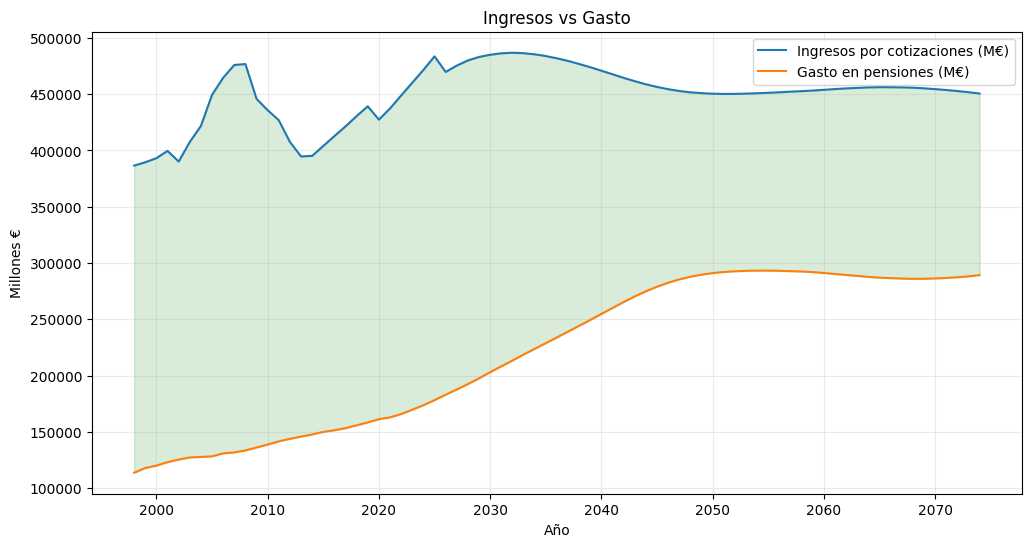

In [25]:


plt.figure(figsize=(12,6))
plt.plot(summary.index, summary["ingresos_cotizaciones"]/1e6, label="Ingresos por cotizaciones (M€)")
plt.plot(summary.index, summary["gasto_pensiones"]/1e6, label="Gasto en pensiones (M€)")
plt.fill_between(summary.index, summary["ingresos_cotizaciones"]/1e6, summary["gasto_pensiones"]/1e6,
                 where=(summary["ingresos_cotizaciones"]>=summary["gasto_pensiones"]), interpolate=True,
                 color="green", alpha=0.15)
plt.fill_between(summary.index, summary["ingresos_cotizaciones"]/1e6, summary["gasto_pensiones"]/1e6,
                 where=(summary["ingresos_cotizaciones"]<summary["gasto_pensiones"]), interpolate=True,
                 color="red", alpha=0.15)
plt.legend()
plt.xlabel("Año")
plt.ylabel("Millones €")
plt.title("Ingresos vs Gasto")
plt.grid(alpha=0.25)
plt.show()




In [28]:
def recalcular_grafico_ingresos_gastos(tasa_paro_slider, tasa_actividad_slider, pension_inicial, inflacion_anual):
    summary_mod = summary.copy()
    
    
    summary_mod["tasa_paro"] = tasa_paro_slider
    summary_mod["tasa_actividad"] = tasa_actividad_slider
    

    summary_mod["cotizantes_est"] = summary_mod["p_laboral"] * summary_mod["tasa_actividad"] * (1 - summary_mod["tasa_paro"])
    summary_mod["ingresos_cotizaciones"] = summary_mod["cotizantes_est"] * cotizacion_media_anual
    
    pension_anual_proy = []
    for i, año in enumerate(summary_mod.index):
        if i == 0:
            pension_anual_proy.append(pension_inicial * pagas_anuales)
        else:
            pension_anual_proy.append(pension_anual_proy[-1] * (1 + inflacion_anual))
    

    summary_mod["gasto_pensiones"] = summary_mod["num_pensionistas_est"] * pension_anual_proy
    
    
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(
        x=summary_mod.index, y=summary_mod["ingresos_cotizaciones"]/1e6,
        mode='lines+markers', name='Ingresos Cotizaciones (M€)',
        line=dict(color='green', width=3)
    ))
    
    fig.add_trace(go.Scatter(
        x=summary_mod.index, y=summary_mod["gasto_pensiones"]/1e6,
        mode='lines+markers', name='Gasto Pensiones (M€)',
        line=dict(color='red', width=3)
    ))

    
    fig.update_layout(
        title=f"Simulación Ingresos y Gasto en Pensiones<br>Tasa Paro: {tasa_paro_slider*100:.1f}%, Tasa Actividad: {tasa_actividad_slider*100:.1f}%, Pensión Inicial: {pension_inicial:.2f}€, Inflación: {inflacion_anual*100:.1f}%",
        xaxis_title="Año",
        yaxis_title="Millones de €",
        template="plotly_white",
        hovermode="x unified"
    )
    
    fig.show()


interact(
    recalcular_grafico_ingresos_gastos,
    tasa_paro_slider=FloatSlider(value=default_tasa_paro, min=0, max=0.3, step=0.01, description="Tasa Paro",style = {'description_width': '150px'},layout=Layout(width='400px'),readout_format=".0%"),
    tasa_actividad_slider=FloatSlider(value=default_tasa_actividad, min=0.4, max=0.8, step=0.01, description="Tasa Actividad",style = {'description_width': '150px'},layout=Layout(width='400px'),readout_format=".0%"),
    pension_inicial=FloatSlider(value=pension_media_mensual, min=800, max=2000, step=10, description="Pensión €/mes",style = {'description_width': '150px'},layout=Layout(width='400px')),
    inflacion_anual=FloatSlider(value=0.02, min=0, max=0.1, step=0.002, description="Inflación anual",style = {'description_width': '150px'},layout=Layout(width='400px'),readout_format=".1%")
)


interactive(children=(FloatSlider(value=0.13, description='Tasa Paro', layout=Layout(width='400px'), max=0.3, …

<function __main__.recalcular_grafico_ingresos_gastos(tasa_paro_slider, tasa_actividad_slider, pension_inicial, inflacion_anual)>